***DBPROGRAMA_AYUDA_CLUBES_FIFA***
--------------------------------------------------------

**Instalación de Librerias**

In [670]:
pip install oracledb

Note: you may need to restart the kernel to use updated packages.


In [671]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [672]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


**Librerias**

In [673]:
# Para la conexión con la base de datos
import oracledb
# Para gestionar dataframes con los resultados de las querys
import pandas as pd
# Para gráficar nuestros resultados
import matplotlib.pyplot as plt

#Datos necesarios para la conexión
p_username = "PROYECTODB"
p_password = "password"
p_dns = "localhost/xe"
p_port = "1521"

**Conexión con la Base de Datos**

In [674]:
# Función de conexión y comprobación
con = oracledb.connect(user=p_username, password=p_password, dsn=p_dns, port=p_port)
print("Conectado")

Conectado


**BÚSQUEDAS**

*1. ¿Cuántos clubes por continente están registrados?*
-------------------------------------------------------------------------------

In [675]:
# Iniciamos la variable para ejecutar la búsqueda
cur = con.cursor()
# Asignamos a una variable la búsqueda a realizar
query = """SELECT "TBContinente"."VarNombreContin", COUNT(DISTINCT "TBClubJugador"."VarIdClub") AS "Count_VarIdClub"
FROM "TBClubJugador"
INNER JOIN "TBJugConvocado" ON "TBClubJugador"."VarIdP" = "TBJugConvocado"."VarIdP"
INNER JOIN "TBSeleccion" ON "TBJugConvocado"."VarIdSeleccion" = "TBSeleccion"."VarIdSeleccion"
INNER JOIN "TBPais" ON "TBSeleccion"."VarIdPais" = "TBPais"."VarIdPais"
INNER JOIN "TBContinente" ON "TBPais"."VarIdContin" = "TBContinente"."VarIdContin"
WHERE "TBClubJugador"."VarIdParam" LIKE 'Prm004' AND "TBClubJugador"."VarIdMundial" = '2022Qatar'
GROUP BY "TBContinente"."VarNombreContin" """
# Asignamos a una variable el resultado de la ejecución de nuestra búsqueda
resultado = cur.execute(query)
# Generamos el dataframe para que guarde nuestra variable resultado con las columnas devueltas por la búsqueda
df = pd.DataFrame(resultado, columns = ['Continentes','Clubes_Registrados'])
# Cerramos la función de conexión
cur.close()

In [676]:
# Asignamos a filas el número de filas devueltas por nuestra búsqueda
filas = df.shape[0]
# Desplegamos la tabla
df.head(filas)

,Continentes,Clubes_Registrados
0,Africa,65
1,America del Sur,52
2,Europa,65
3,America del Norte,65
4,Antartida,52
5,Asia,65
6,Oceania,52


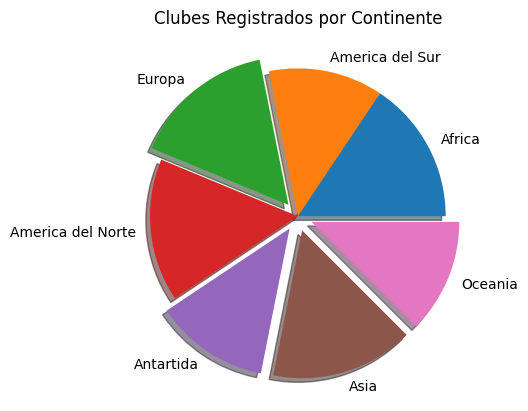

In [677]:
# Generaremos un gráfico de pastel con la función plt.pie
# Separaremos del gráfico a los valores mayores de nuestro resultado
myexplode = [0, 0, 0.1, 0, 0.1, 0.1, 0.1]
# Asignaremos los valores que corresponderán al gráfico
plt.pie(df["Clubes_Registrados"], labels=df["Continentes"],explode = myexplode,shadow=True)
plt.title('Clubes Registrados por Continente')
plt.show()

*2. ¿Cuántos jugadores cumplen con el parámetro de ser convocados más de 2 años?*
-------------------------------------------------------------------------------

In [678]:
# Iniciamos la variable para ejecutar la búsqueda
cur = con.cursor()
# Asignamos a una variable la búsqueda a realizar
query = """SELECT "TBParametro"."VarIdParam", "TBParametro"."VarDescripcionParam",
COUNT("TBClubJugador"."VarIdP") AS "Count_VarIdP"
FROM "TBJugConvocado"
INNER JOIN "TBClubJugador" ON "TBJugConvocado"."VarIdP" = "TBClubJugador"."VarIdP"
INNER JOIN "TBParametro" ON "TBClubJugador"."VarIdParam" = "TBParametro"."VarIdParam"
WHERE "TBClubJugador"."VarIdParam" LIKE 'Prm002' AND "TBClubJugador"."VarIdMundial" = '2022Qatar'
GROUP BY "TBParametro"."VarIdParam", "TBParametro"."VarDescripcionParam" """
# Asignamos a una variable el resultado de la ejecución de nuestra búsqueda
resultado = cur.execute(query)
# Generamos el dataframe para que guarde nuestra variable resultado con las columnas devueltas por la búsqueda
df = pd.DataFrame(resultado, columns = ['Id_Parametro','Descripcion_Parametro','Jugadores'])
# Cerramos la función de conexión
cur.close()

In [679]:
# Asignamos a filas el número de filas devueltas por nuestra búsqueda
filas = df.shape[0]
# Desplegamos la tabla
df.head(filas)

,Id_Parametro,Descripcion_Parametro,Jugadores
0,Prm002,2 Anios Como Jugador del Club,2500


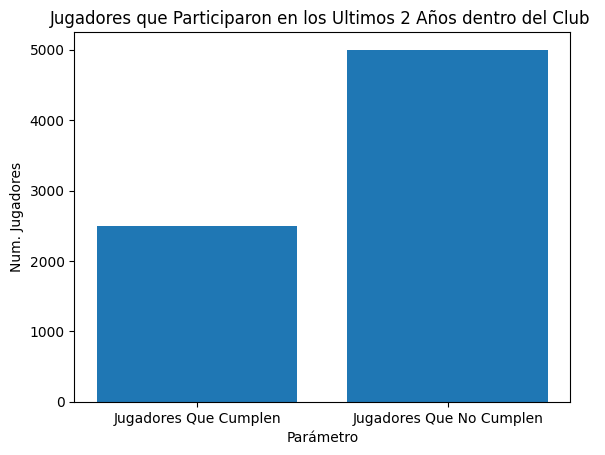

In [680]:
# Iniciamos la figura de barra a graficar
fig, ax = plt.subplots()
# Asignamos valores para los ejes X y Y
ax.bar(['Jugadores Que Cumplen', 'Jugadores Que No Cumplen'], [df.Jugadores.sum(), 5000])
# Asignaremos los valores que corresponderán al gráfico
plt.title('Jugadores que Participaron en los Ultimos 2 Años dentro del Club ')
ax.set_xlabel('Parámetro')
ax.set_ylabel('Num. Jugadores')
plt.show()

*3. ¿Qué clubes por confederación cumplen con los 2 anteriores apartados?*
-------------------------------------------------------------------------------

In [681]:
# Iniciamos la variable para ejecutar la búsqueda
cur = con.cursor()
# Asignamos a una variable la búsqueda a realizar
query = """SELECT DISTINCT "TBConfederacion"."VarIdConf",
"TBConfederacion"."VarNombreConf", "TBClub"."VarNombreClub",
COUNT("TBClubJugador"."VarIdP")
FROM "TBConfederacion"
INNER JOIN "TBClub" ON "TBConfederacion"."VarIdConf" = "TBClub"."VarIdConf"
INNER JOIN "TBClubJugador" ON "TBClub"."VarIdClub" = "TBClubJugador"."VarIdClub"
WHERE "TBClubJugador"."VarIdMundial" = '2022Qatar'
GROUP BY "TBConfederacion"."VarIdConf","TBConfederacion"."VarNombreConf",
"TBClub"."VarNombreClub","TBClubJugador"."VarIdP"
HAVING COUNT("TBClubJugador"."VarIdP") = 3
ORDER BY "TBConfederacion"."VarIdConf" """
# Asignamos a una variable el resultado de la ejecución de nuestra búsqueda
resultado = cur.execute(query)
# Generamos el dataframe para que guarde nuestra variable resultado con las columnas devueltas por la búsqueda
df = pd.DataFrame(resultado, columns = ['Id_Confederacion','Nombre_Confederacion','Nombre_Club','Parametros_Cumplidos'])
# Cerramos la función de conexión
cur.close()

In [682]:
# Asignamos a filas el número de filas devueltas por nuestra búsqueda
filas = df.shape[0]
# Desplegamos la tabla
df.head(filas)

,Id_Confederacion,Nombre_Confederacion,Nombre_Club,Parametros_Cumplidos
0,Conf01,AFC,Club 1,3
1,Conf01,AFC,Club 103,3
2,Conf01,AFC,Club 109,3
3,Conf01,AFC,Club 115,3
4,Conf01,AFC,Club 121,3
...,...,...,...,...
411,Conf06,UEFA,Club 72,3
412,Conf06,UEFA,Club 78,3
413,Conf06,UEFA,Club 84,3
414,Conf06,UEFA,Club 90,3


*4. ¿A qué clubes pertenecen los mejores jugadores de la copa del mundo?*
-------------------------------------------------------------------------------

In [683]:
# Iniciamos la variable para ejecutar la búsqueda
cur = con.cursor()
# Asignamos a una variable la búsqueda a realizar
query = """SELECT DISTINCT "TBClub"."VarIdClub", "TBClub"."VarNombreClub",
"TBPersona"."VarNombreP", "TBJugConvocado"."IntDiasEnMundialJc"
FROM "TBClub"
INNER JOIN "TBClubJugador" ON "TBClub"."VarIdClub" = "TBClubJugador"."VarIdClub"
INNER JOIN "TBJugConvocado" ON "TBClubJugador"."VarIdP" = "TBJugConvocado"."VarIdP"
INNER JOIN "TBPersona" ON "TBJugConvocado"."VarIdP" = "TBPersona"."VarIdP"
WHERE "TBJugConvocado"."IntDiasEnMundialJc" LIKE 30 AND "TBClubJugador"."VarIdMundial" = '2022Qatar' """
# Asignamos a una variable el resultado de la ejecución de nuestra búsqueda
resultado = cur.execute(query)
# Generamos el dataframe para que guarde nuestra variable resultado con las columnas devueltas por la búsqueda
df = pd.DataFrame(resultado, columns = ['Id_Club','Nombre_Club','Nombre_Jugador','Dias_En_Mundial'])
# Cerramos la función de conexión
cur.close()

In [684]:
# Asignamos a filas el número de filas devueltas por nuestra búsqueda
filas = df.shape[0]
# Desplegamos la tabla
df.head(filas)

,Id_Club,Nombre_Club,Nombre_Jugador,Dias_En_Mundial
0,Clu001,Club 1,Joseph Mcbride,30
1,Clu002,Club 2,Jack Gonzales,30
2,Clu003,Club 3,Mark Thomas,30
3,Clu004,Club 4,Richard Miller,30
4,Clu005,Club 5,Jacob Wood,30
5,Clu006,Club 6,Nicholas Barnes,30
6,Clu007,Club 7,Mike Gilbert,30
7,Clu008,Club 8,Jacob Crawford,30
8,Clu009,Club 9,Bradley Nguyen,30
9,Clu010,Club 10,Keith Lewis,30


*5. Por continente, ¿Cuántos jugadores alrededor del mundo pertenecen a la confederación de la UEFA?*
-------------------------------------------------------------------------------

In [685]:
# Iniciamos la variable para ejecutar la búsqueda
cur = con.cursor()
# Asignamos a una variable la búsqueda a realizar
query = """SELECT "TBContinente"."VarIdContin", "TBContinente"."VarNombreContin",
"TBClubJugador"."VarIdConf" as "UEFA",
COUNT(DISTINCT "TBClubJugador"."VarIdP") AS "Count_VarIdP"
FROM "TBContinente"
INNER JOIN "TBPais" ON "TBContinente"."VarIdContin" = "TBPais"."VarIdContin"
INNER JOIN "TBSeleccion" ON "TBPais"."VarIdPais" = "TBSeleccion"."VarIdPais"
INNER JOIN "TBJugConvocado" ON "TBSeleccion"."VarIdSeleccion" = "TBJugConvocado"."VarIdSeleccion"
INNER JOIN "TBClubJugador" ON "TBJugConvocado"."VarIdP" = "TBClubJugador"."VarIdP"
WHERE "TBClubJugador"."VarIdConf" LIKE 'Conf06' AND "TBClubJugador"."VarIdMundial" = '2022Qatar'
GROUP BY "TBContinente"."VarIdContin", "TBContinente"."VarNombreContin","TBClubJugador"."VarIdConf"
ORDER BY "TBContinente"."VarIdContin" """
# Asignamos a una variable el resultado de la ejecución de nuestra búsqueda
resultado = cur.execute(query)
# Generamos el dataframe para que guarde nuestra variable resultado con las columnas devueltas por la búsqueda
df = pd.DataFrame(resultado, columns = ['Id_Continente','Nombre_Continente','UEFA','Jugadores'])
# Cerramos la función de conexión
cur.close()

In [686]:
# Asignamos a filas el número de filas devueltas por nuestra búsqueda
filas = df.shape[0]
# Desplegamos la tabla
df.head(filas)

,Id_Continente,Nombre_Continente,UEFA,Jugadores
0,Conti01,Europa,Conf06,96
1,Conti02,Asia,Conf06,156
2,Conti03,Africa,Conf06,108
3,Conti04,America del Norte,Conf06,156
4,Conti05,America del Sur,Conf06,108
5,Conti06,Antartida,Conf06,109
6,Conti07,Oceania,Conf06,96


Text(0, 0.5, 'Continentes')

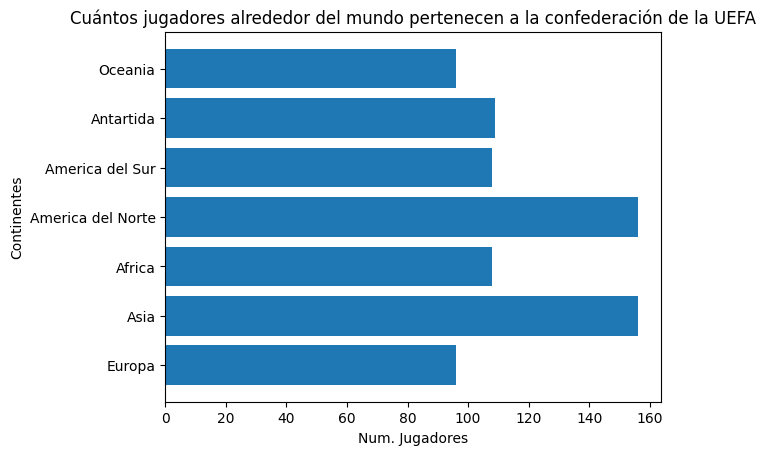

In [687]:
# Iniciamos la figura de barra a graficar
plt.figure()    
# Asignamos valores para los ejes X y Y
plt.barh(df['Nombre_Continente'], df['Jugadores'])     
# Asignaremos los valores que corresponderán al gráfico
plt.title('Cuántos jugadores alrededor del mundo pertenecen a la confederación de la UEFA')      
ax = plt.subplot()    
ax.set_xlabel('Num. Jugadores') 
ax.set_ylabel('Continentes')

In [688]:
# Iniciamos la variable para ejecutar la búsqueda
cur = con.cursor()
# Asignamos a una variable la búsqueda a realizar
query = """SELECT "TBContinente"."VarIdContin", "TBContinente"."VarNombreContin",
"TBClubJugador"."VarIdConf" as "UEFA",
COUNT(DISTINCT "TBClubJugador"."VarIdP") AS "Count_VarIdP"
FROM "TBContinente"
INNER JOIN "TBPais" ON "TBContinente"."VarIdContin" = "TBPais"."VarIdContin"
INNER JOIN "TBSeleccion" ON "TBPais"."VarIdPais" = "TBSeleccion"."VarIdPais"
INNER JOIN "TBJugConvocado" ON "TBSeleccion"."VarIdSeleccion" = "TBJugConvocado"."VarIdSeleccion"
INNER JOIN "TBClubJugador" ON "TBJugConvocado"."VarIdP" = "TBClubJugador"."VarIdP"
WHERE "TBClubJugador"."VarIdConf" LIKE 'Conf04' AND "TBClubJugador"."VarIdMundial" = '2022Qatar'
GROUP BY "TBContinente"."VarIdContin", "TBContinente"."VarNombreContin","TBClubJugador"."VarIdConf"
ORDER BY "TBContinente"."VarIdContin" """
# Asignamos a una variable el resultado de la ejecución de nuestra búsqueda
resultado = cur.execute(query)
# Generamos el dataframe para que guarde nuestra variable resultado con las columnas devueltas por la búsqueda
df = pd.DataFrame(resultado, columns = ['Id_Continente','Nombre_Continente','Conmebol','Jugadores'])
# Cerramos la función de conexión
cur.close()

In [689]:
# Asignamos a filas el número de filas devueltas por nuestra búsqueda
filas = df.shape[0]
# Desplegamos la tabla
df.head(filas)

,Id_Continente,Nombre_Continente,Conmebol,Jugadores
0,Conti01,Europa,Conf04,108
1,Conti02,Asia,Conf04,156
2,Conti03,Africa,Conf04,108
3,Conti04,America del Norte,Conf04,157
4,Conti05,America del Sur,Conf04,96
5,Conti06,Antartida,Conf04,96
6,Conti07,Oceania,Conf04,108


Text(0, 0.5, 'Continentes')

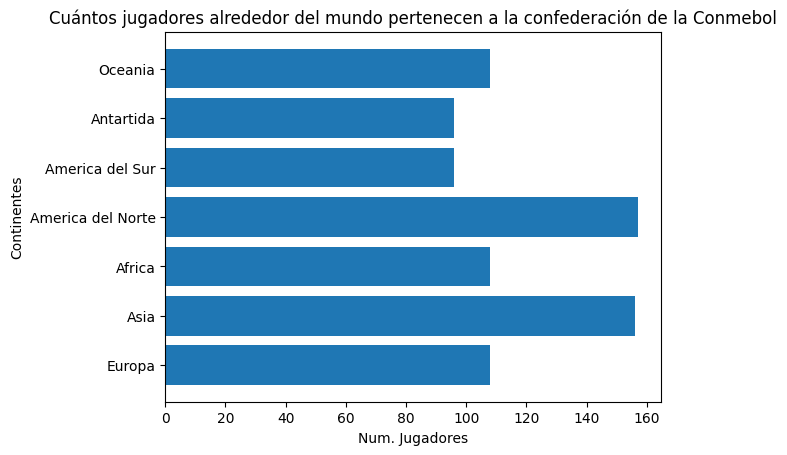

In [690]:
# Iniciamos la figura de barra a graficar
plt.figure()    
# Asignamos valores para los ejes X y Y
plt.barh(df['Nombre_Continente'], df['Jugadores'])      
# Asignaremos los valores que corresponderán al gráfico
plt.title('Cuántos jugadores alrededor del mundo pertenecen a la confederación de la Conmebol')      
ax = plt.subplot()    
ax.set_xlabel('Num. Jugadores') 
ax.set_ylabel('Continentes')

*6. ¿Cuáles son los 10 clubes que obtuvieron más ingresos?*
-------------------------------------------------------------------------------

In [691]:
# Iniciamos la variable para ejecutar la búsqueda
cur = con.cursor()
# Asignamos a una variable la búsqueda a realizar
query = """SELECT "TBClub"."VarIdClub", "TBClub"."VarNombreClub",
SUM(DISTINCT "TBJugConvocado"."IntDiasEnMundialJc") * 10000 as GANANCIAS
FROM "TBClub"
INNER JOIN "TBClubJugador" ON "TBClub"."VarIdClub" = "TBClubJugador"."VarIdClub"
INNER JOIN "TBJugConvocado" ON "TBClubJugador"."VarIdP" = "TBJugConvocado"."VarIdP"
WHERE "TBClubJugador"."VarIdParam" LIKE 'Prm001' AND "TBClubJugador"."VarIdMundial" = '2022Qatar'
GROUP BY "TBClub"."VarIdClub","TBClub"."VarNombreClub"
ORDER BY (SUM(DISTINCT "TBJugConvocado"."IntDiasEnMundialJc") * 10000) DESC
FETCH NEXT 10 ROWS ONLY """
# Asignamos a una variable el resultado de la ejecución de nuestra búsqueda
resultado = cur.execute(query)
# Generamos el dataframe para que guarde nuestra variable resultado con las columnas devueltas por la búsqueda
df = pd.DataFrame(resultado, columns = ['Id_Club','Nombre_Club','Ganancias'])
# Cerramos la función de conexión
cur.close()

In [692]:
# Asignamos a filas el número de filas devueltas por nuestra búsqueda
filas = df.shape[0]
# Desplegamos la tabla
df.head(filas)

,Id_Club,Nombre_Club,Ganancias
0,Clu001,Club 1,900000
1,Clu025,Club 25,820000
2,Clu009,Club 9,780000
3,Clu040,Club 40,780000
4,Clu044,Club 44,780000
5,Clu038,Club 38,780000
6,Clu022,Club 22,780000
7,Clu028,Club 28,740000
8,Clu045,Club 45,740000
9,Clu046,Club 46,740000


Text(0, 0.5, 'Clubes')

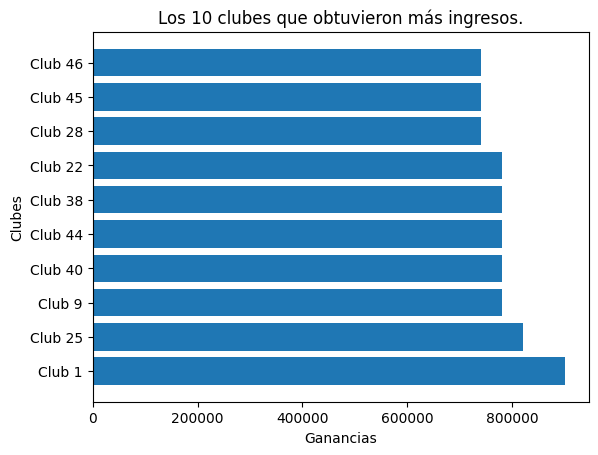

In [693]:
# Iniciamos la figura de barra a graficar
plt.figure()    
# Asignamos valores para los ejes X y Y
plt.barh(df['Nombre_Club'], df['Ganancias'])      
# Asignaremos los valores que corresponderán al gráfico
plt.title('Los 10 clubes que obtuvieron más ingresos.')      
ax = plt.subplot()    
ax.set_xlabel('Ganancias') 
ax.set_ylabel('Clubes')

*7. ¿Qué cantidad de dinero total tiene que pagar la FIFA a cada confederación?*
-------------------------------------------------------------------------------

In [694]:
# Iniciamos la variable para ejecutar la búsqueda
cur = con.cursor()
# Asignamos a una variable la búsqueda a realizar
query = """SELECT "TBConfederacion"."VarIdConf", "TBConfederacion"."VarNombreConf",
SUM("TBJugConvocado"."IntDiasEnMundialJc") * 10000 as PAGO
from "TBClubJugador"
INNER JOIN "TBJugConvocado" ON "TBClubJugador"."VarIdP" = "TBJugConvocado"."VarIdP"
INNER JOIN "TBClub" ON "TBClub"."VarIdClub" = "TBClubJugador"."VarIdClub"
INNER JOIN "TBConfederacion" ON "TBConfederacion"."VarIdConf" = "TBClub"."VarIdConf"
where "TBClubJugador"."VarIdParam" LIKE 'Prm001' AND "TBClubJugador"."VarIdMundial" = '2022Qatar'
GROUP BY "TBConfederacion"."VarIdConf", "TBConfederacion"."VarNombreConf" """
# Asignamos a una variable el resultado de la ejecución de nuestra búsqueda
resultado = cur.execute(query)
# Generamos el dataframe para que guarde nuestra variable resultado con las columnas devueltas por la búsqueda
df = pd.DataFrame(resultado, columns = ['Id_Confederación','Nombre_Confederación','Pago'])
# Cerramos la función de conexión
cur.close()

In [695]:
# Asignamos a filas el número de filas devueltas por nuestra búsqueda
filas = df.shape[0]
# Desplegamos la tabla
df.head(filas)

,Id_Confederación,Nombre_Confederación,Pago
0,Conf01,AFC,42540000
1,Conf02,CAF,42380000
2,Conf03,Concacaf,41940000
3,Conf04,Conmebol,41820000
4,Conf05,OFC,40720000
5,Conf06,UEFA,41640000


Text(0, 0.5, 'Pago')

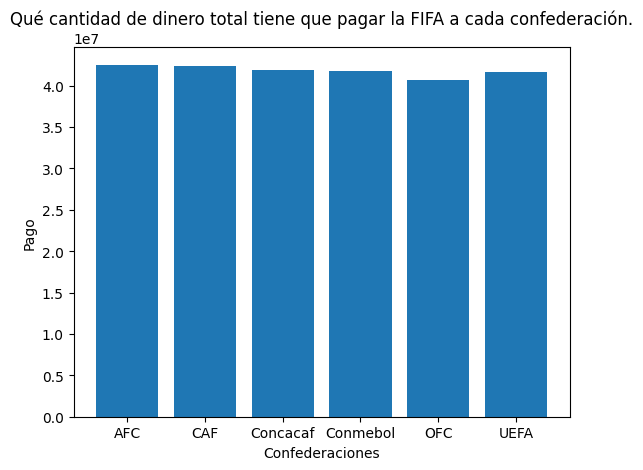

In [696]:
# Iniciamos la figura de barra a graficar
plt.figure()    
# Asignamos valores para los ejes X y Y
plt.bar(df['Nombre_Confederación'], df['Pago'])      
# Asignaremos los valores que corresponderán al gráfico
plt.title('Qué cantidad de dinero total tiene que pagar la FIFA a cada confederación.')      
ax = plt.subplot()    
ax.set_xlabel('Confederaciones') 
ax.set_ylabel('Pago')

*8. ¿Cuánto se gastó en este mundial?*
-------------------------------------------------------------------------------

In [697]:
# Iniciamos la variable para ejecutar la búsqueda
cur = con.cursor()
# Asignamos a una variable la búsqueda a realizar
query = """SELECT "TBMundial"."VarIdMundial",
"TBClubJugador"."VarIdParam",
CASE
WHEN "TBMundial"."VarIdMundial" = '2018Russia' THEN SUM("TBJugConvocado"."IntDiasEnMundialJc") * 8000
WHEN "TBMundial"."VarIdMundial" = '2022Qatar' THEN SUM("TBJugConvocado"."IntDiasEnMundialJc") * 10000
END as GASTO
FROM "TBMundial"
LEFT JOIN "TBContinente" ON "TBContinente"."VarIdMundial" = "TBMundial"."VarIdMundial"
LEFT JOIN "TBPais" ON "TBPais"."VarIdContin" = "TBContinente"."VarIdContin"
LEFT JOIN "TBSeleccion" ON "TBSeleccion"."VarIdPais" = "TBPais"."VarIdPais"
LEFT JOIN "TBJugConvocado" ON "TBJugConvocado"."VarIdSeleccion" = "TBSeleccion"."VarIdSeleccion"
LEFT JOIN "TBClubJugador" ON "TBClubJugador"."VarIdP" = "TBJugConvocado"."VarIdP"
WHERE "TBClubJugador"."VarIdParam" LIKE 'Prm001'
GROUP BY "TBMundial"."VarIdMundial", "TBClubJugador"."VarIdParam" """
# Asignamos a una variable el resultado de la ejecución de nuestra búsqueda
resultado = cur.execute(query)
# Generamos el dataframe para que guarde nuestra variable resultado con las columnas devueltas por la búsqueda
df = pd.DataFrame(resultado, columns = ['Id_Mundial','Id_Parámetro','Gasto'])
# Cerramos la función de conexión
cur.close()

In [698]:
# Asignamos a filas el número de filas devueltas por nuestra búsqueda
filas = df.shape[0]
# Desplegamos la tabla
df.head(filas)

,Id_Mundial,Id_Parámetro,Gasto
0,2022Qatar,Prm001,251040000


Text(0, 0.5, 'Gasto')

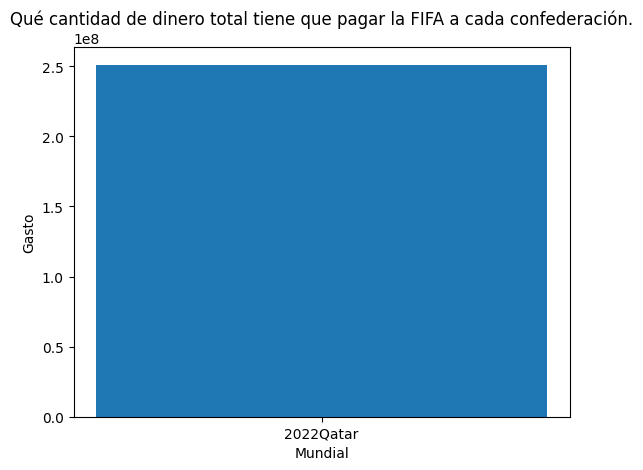

In [699]:
# Iniciamos la figura de barra a graficar
plt.figure()    
# Asignamos valores para los ejes X y Y
plt.bar(df['Id_Mundial'], df['Gasto'])      
# Asignaremos los valores que corresponderán al gráfico
plt.title('Qué cantidad de dinero total tiene que pagar la FIFA a cada confederación.')      
ax = plt.subplot()    
ax.set_xlabel('Mundial') 
ax.set_ylabel('Gasto')